<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/Lesson_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Рекомендательные системы

<h2> Content-based

Content-Based рекомендательные системы — это подход, который строит персонализированные рекомендации на основе анализа контента объектов и предпочтений пользователя. В отличие от коллаборативной фильтрации, которая опирается на поведение множества пользователей, content-based системы фокусируются на индивидуальных данных. В рамках данного подхода описание товара (content) сопоставляется с интересами пользователя, полученными из его предыдущих оценок. Чем больше товар этим интересам соответствует, тем выше оценивается потенциальная заинтересованность пользователя. Очевидное требование здесь — у всех товаров в каталоге должно быть описание.


Исторически предметом Content-based рекомендаций чаще были товары с неструктурированным описанием: фильмы, книги, статьи. Такими признаками могут быть, например, текстовые описания, рецензии, состав актеров и прочее. Однако ничто не мешает использовать и обычные числовые или категориальные признаки.

Неструктурированные признаки описываются типичным для текста способом – векторами в пространстве слов (Модель векторного пространства). Каждый элемент такого вектора – признак, потенциально характеризующий интерес пользователя. Аналогично, продукт – вектор в том же пространстве.
По мере взаимодействия пользователя с системой (скажем, он покупает фильмы), векторные описания приобретенных им товаров объединяются (суммируются и нормализуются) в единый вектор и, таким образом, формируется вектор его интересов. Далее достаточно найти товар, описание которого наиболее близко к вектору интересов, т.е. решить задачу поиска n ближайших соседей.

Не все элементы одинаково значимы: например, союзные слова, очевидно, не несут никакой полезной нагрузки. Поэтому при определении числа совпадающих элементов в двух векторах все измерения нужно предварительно взвешивать по их значимости. Данную задачу решает хорошо известное в Text Mining преобразование TF-IDF, которое назначает больший вес более редким интересам. Совпадение таких интересов имеет большее значение при определении близости двух векторов, чем совпадение популярных.

<h2> 2. Методы векторизации

Преобразуют нечисловые данные (текст, категории, изображения) в числовые векторы для анализа.

<h3> Преобразование TF-IDF

Term Frequency-Inverse Document Frequency (TF-IDF) — это один из наиболее распространенных и мощных методов для извлечения признаков из текстовых данных. TF-IDF вычисляет важность каждого слова в документе относительно количества его употреблений в данном документе и во всей коллекции текстов. Этот метод позволяет выделить ключевые слова и понять, какие слова имеют больший вес для определенного документа в контексте всей коллекции.

TF (Частота термина) обозначает, насколько часто определенное слово появляется в данном документе. Таким образом, TF измеряет важность слова в контексте отдельного документа.

IDF (Обратная частота документа) измеряет, насколько уникально слово является по всей коллекции документов. Слова, которые появляются в большинстве документов, имеют низкое IDF, так как они не вносят большой информационной ценности.

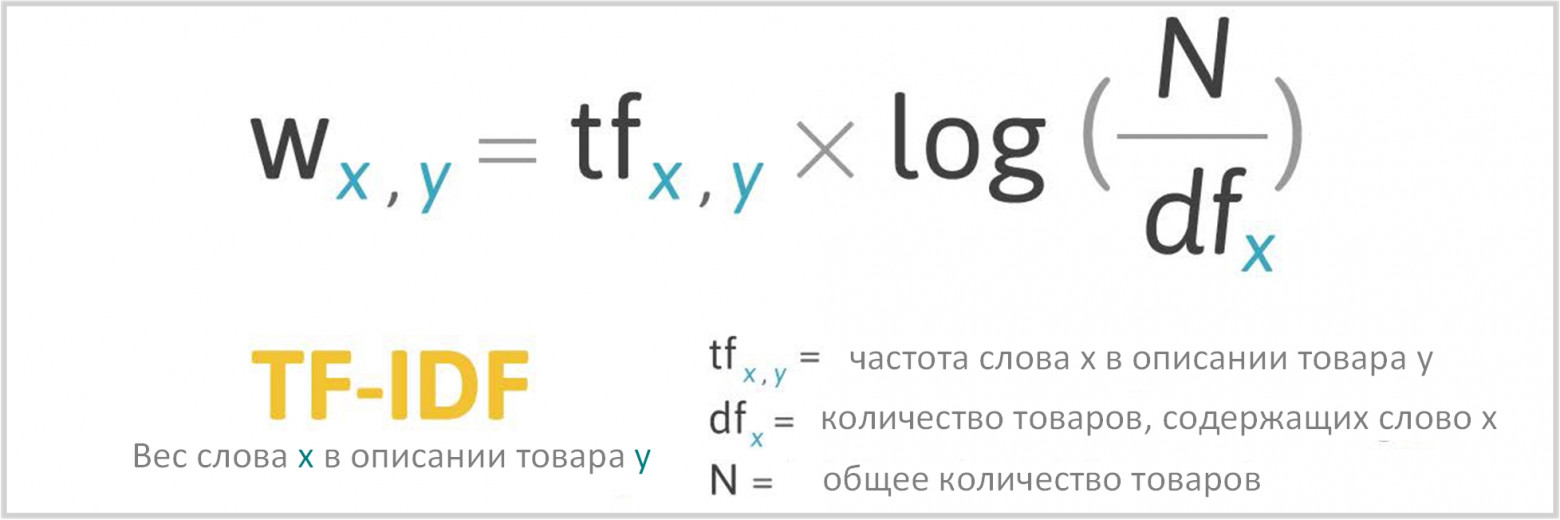

 Картинка ниже иллюстрирует, как именно зависит вес TF-IDF от показателей TF и IDF. Ближняя горизонтальная ось — это DF: частота атрибута среди всех товаров, дальняя горизонтальная ось — TF: логарифм частоты атрибута у пользователя.

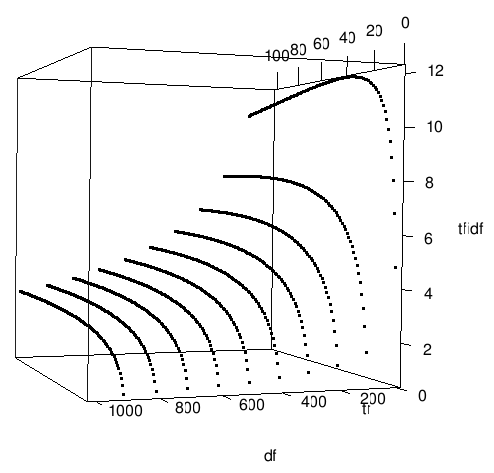

Некоторые моменты которые можно учесть при реализации.

- При формировании vector-space представления товара вместо отдельных слов можно использовать шинглы или n-граммы (последовательные пары слов, тройки и т.д.). Это сделает модель более детализированной, однако потребуется больше данных для обучения.
- В разных местах описания товара вес ключевых слов может отличаться (например описание фильма может состоять из заголовка, краткого описания и детального описания).
- Описания товара от разных пользователей можно взвешивать по-разному. Например, можем давать больший вес активным пользователям, у которых много оценок.
- Аналогично можно взвешивать и по товару. Чем больше средний рейтинг объекта, тем больше его вес (аналог PageRank).
Если описание товара допускает ссылки на внешние источники, то можно заморочиться и анализировать также всю связанную с товаром стороннюю информацию.

Плюсы:

- Простота реализации.

- Учитывает значимость слов.

Минусы:

- Игнорирует семантику (например, синонимы: "кино" vs "фильм").

- Не подходит для коротких текстов.

<h3> Унитарный код (One-hot)

One-Hot Encoding — это важнейший метод в области науки о данных и обучение с помощью машины, в основном используется для преобразования категориальных переменных в числовой формат, который может быть легко понят алгоритмами. По сути, этот метод преобразует каждую категорию переменной в новый двоичный столбец, где каждый столбец соответствует категории и содержит 1 или 0, указывающие на наличие или отсутствие этой категории в данных. Это преобразование необходимо, поскольку многие алгоритмы машинного обучения, особенно основанные на линейных моделях, требуют числового ввода для корректной работы.

Принцип работы:
Каждая категория преобразуется в бинарный вектор.
Например, для жанров ["комедия", "драма", "фантастика"]:

- "комедия" → [1, 0, 0].

- "драма" → [0, 1, 0].

Плюсы:

- Простота.

- Подходит для категориальных данных.

Минусы:

- Высокая размерность при множестве категорий (проклятие размерности).

- Не учитывает связи между категориями (например, "комедия" и "фарс").

<h3> Word2vec

Нейросетевая модель, преобразующая слова в векторы так, чтобы семантически близкие слова были ближе в векторном пространстве.

Давайте же погрузимся в тему. Слова-векторы (word vectors) — это численные представления слов, сохраняющие семантическую связь между ними. Например, для вектора cat (кошка) одним из наиболее близких будет слово dog (собака). Однако векторное представление слова pencil (карандаш) будет достаточно сильно отличаться от вектора cat. Эта схожесть обусловлена частотой встречаемости двух слов (т.е. [cat, dog] или [cat, pencil]) в одном контексте. Рассмотрим следующее предложение:

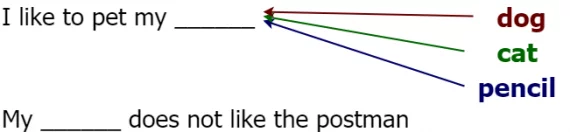

Все дело в контексте, pencil не подходит по смыслу. Этот пример должен убедить вас в важности контекста. Алгоритмы word2vec используют контекст, чтобы сформировать численные представления слов, поэтому слова, используемые в одном и том же контексте, имеют похожие векторы.

Плюсы:

- Улавливает семантику и синтаксис.

- Векторы имеют фиксированную размерность.

Минусы:

- Требует больших данных для обучения.

- Не учитывает многозначность слов (например, "ключ" как инструмент или источник).

<h3> Модель BERT

Трансформерная модель, анализирующая контекст слова с учетом всего предложения (бидирекционально). BERT использует трансформер — механизм “внимания”, который изучает контекстуальные отношения между словами (или подсловами) в тексте. В своей оригинальной форме трансформер включает в себя два отдельных механизма — кодировщик, который считывает введенный текст, и декодер, который выдает прогноз для задачи. Поскольку целью BERT является создание языковой модели, то ей необходим только кодировщик.

В отличие от направленных моделей, которые считывают вводимый текст последовательно (слева направо или справа налево), кодировщик трансформера считывает сразу всю последовательность слов. Поэтому он считается двунаправленным, хотя правильнее было бы сказать, что он не имеет конкретного направления. Эта особенность позволяет модели изучать контекст слова на основе всего его окружения (слева и справа от слова).

При обучении языковых моделей возникает проблема определения цели прогнозирования. Многие модели предсказывают следующее слово в последовательности (например, “Ребенок пришел домой из ___”) — это направленный подход, который по своей сути ограничивает контекстное обучение. Чтобы преодолеть эту проблему, BERT использует две стратегии обучения:

Маскированное языковое моделирование (MLM)


Перед вводом последовательности слов в BERT 15% слов в каждой последовательности заменяется токеном [MASK]. Затем модель пытается предсказать исходное значение замаскированных слов на основе контекста, предоставляемого другими, не замаскированными словами в последовательности. С технической точки зрения, предсказание выходных слов требует:

- Добавления слоя классификации поверх выходных данных кодировщика.

- Умножение выходных векторов на матрицу векторных представлений словаря (embedding matrix), преобразующую их к размерности словаря.

- Расчет вероятности каждого слова в словаре с помощью softmax.

Прогнозирование следующего предложения (NSP)

В рамках процесса обучения BERT модель в качестве входных данных получает пары фраз, на которых она учится предсказывать, является ли вторая фраза в паре следующей после первой в исходном тексте. Во время обучения 50% входных данных представляют собой пары, в которых вторая фраза действительно является следующей фразой в исходном тексте, а в остальных 50% в качестве второй фразы выбирается случайная фраза из того же текста. Предполагается, что случайная фраза будет не связана по смыслу с первой фразой.

Чтобы помочь модели различить две фразы в процессе обучения, перед входом в модель входные данные обрабатываются следующим образом:

- В начало первой фразы вставляется токен [CLS]. В конец каждой из фраз вставляется токен [SEP].

- К каждому токену добавляется эмбеддинг (векторное представление) фразы, обозначающий Фразу A или Фразу B. Эмбеддинги фраз по своей концепции аналогичны эмбеддингам токенов со словарем из двух элементов.

- К каждому токену добавляется позиционный эмбеддинг, чтобы указать его положение в последовательности. Концепция и реализация позиционного эмбеддинга хорошо раскрыты в статье, посвященной трансформеру.

Плюсы:

- Учитывает контекст.

- Подходит для сложных NLP-задач (поиск ответов, классификация).

Минусы:

- Вычислительно затратен.

- Требует тонкой настройки под конкретную задачу.

<h3> Embedding (общее понятие)

Эмбеддинг - это процесс преобразования каких-либо данных (чаще всего текста, но могут быть и изображения, звуки и т.д.) в набор чисел, векторы, которые машина может не только хранить, но и с которыми она может работать.

Эмбеддинги не ограничиваются только словами. В компьютерном зрении, например, можно использовать их для преобразования изображений в вектора, чтобы машина могла понять и различать изображения.

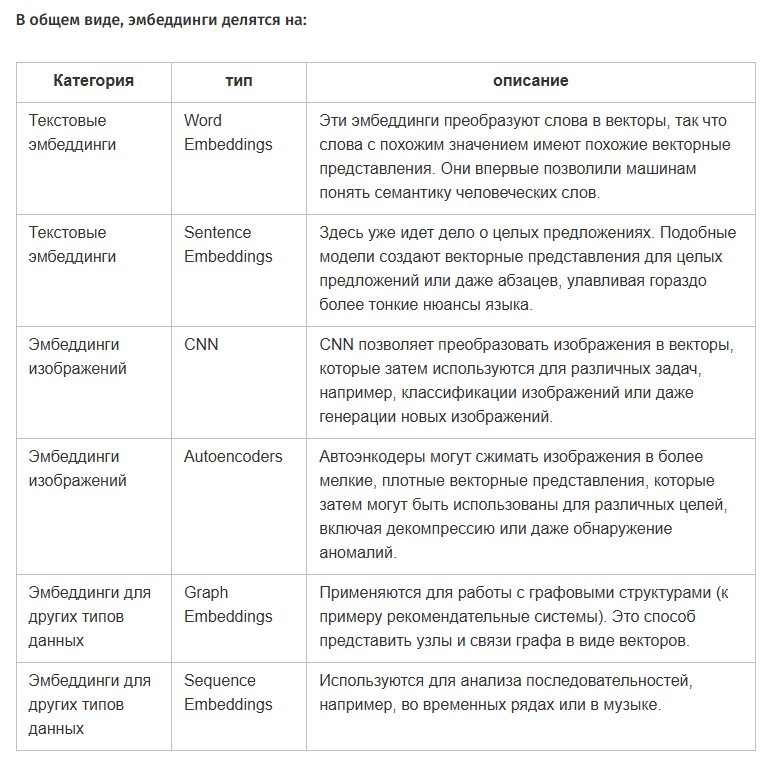

Плюсы:

- Автоматическое извлечение признаков.

-  Улавливает скрытые закономерности.

Минусы:

- Требует большого объема данных.

- Сложность интерпретации.

<h2> 3. Расчет схожести

Расчет схожести — это ключевой этап, на котором определяется, насколько объекты (фильмы, товары, статьи) соответствуют предпочтениям пользователя. Процесс включает сравнение векторов, описывающих контент и профиль пользователя, с помощью математических метрик. Рассмотрим его детально.

<h3> Общий процесс

1. Векторизация объектов: Каждый объект (например, фильм) преобразуется в числовой вектор на основе его признаков (жанр, описание, теги). Пример: Фильм "Интерстеллар" → вектор [0.9, 0.2, 0.7, ...], где компоненты соответствуют научной фантастике, космосу, драме и т.д.

2. Профиль пользователя: Формируется как усредненный или взвешенный вектор объектов, с которыми взаимодействовал пользователь.  Пример: Если пользователь смотрел "Интерстеллар" (вектор [0.9, 0.2, 0.7]) и "Марсианин" (вектор [0.8, 0.3, 0.6]), его профиль:
[(0.9 + 0.8)/2, (0.2 + 0.3)/2, (0.7 + 0.6)/2] = [0.85, 0.25, 0.65].

3. Сравнение векторов: Профиль пользователя сравнивается с векторами всех объектов в системе с помощью выбранной метрики схожести.

<h3> Основные метрики схожести

<h3> Косинусная схожесть

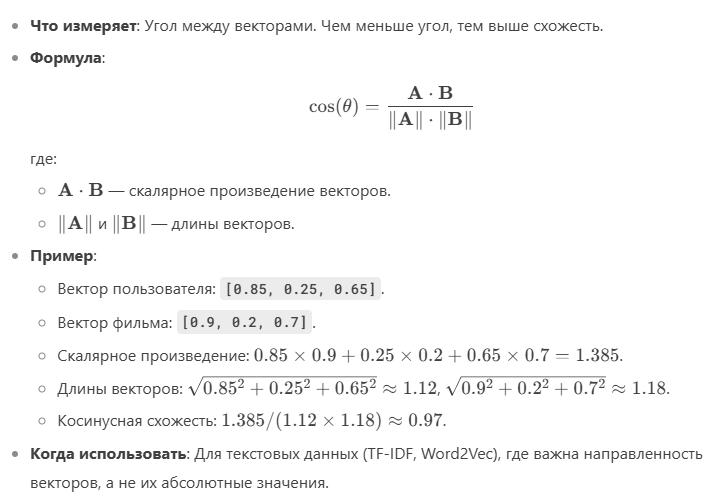

<h3> Евклидово расстояние

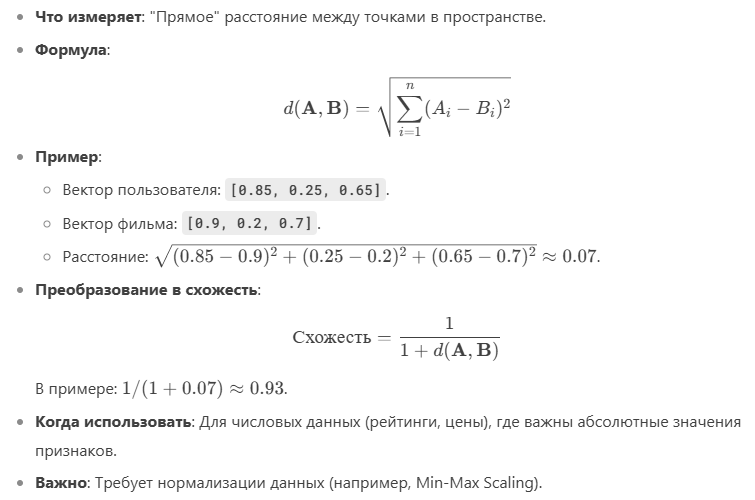

<h3> Индекс Жаккара

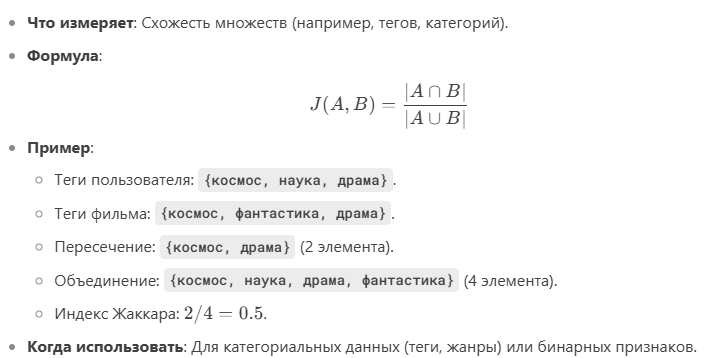

<h2> 3. Формирование профиля пользователя

Профиль пользователя — это вектор, отражающий его предпочтения. Способы его построения:

<h3> Среднее арифметическое

In [ ]:
"Усреднение векторов всех объектов, с которыми взаимодействовал пользователь."
user_profile = np.mean([movie1_vector, movie2_vector, ...], axis=0)

<h3> Взвешенное среднее

In [ ]:
"Учет 'веса' взаимодействий (например, оценки или время просмотра)"
weights = [5, 3]  # Оценки пользователя за фильмы
user_profile = np.average([movie1_vector, movie2_vector], axis=0, weights=weights)

<h3> Временное сглаживание

In [ ]:
"Свежие взаимодействия имеют больший вес."
weights = [0.9, 0.1]  # Последний просмотр важнее
user_profile = np.average([movie1_vector, movie2_vector], axis=0, weights=weights)

<h3> Проблемы и решения

- Проблема: Выбор неподходящей метрики.

Решение: Экспериментируйте! Для текста — косинусная схожесть, для категорий — Жаккард.

- Проблема: Неравномерные шкалы признаков.

Решение: Нормализация данных (StandardScaler, MinMaxScaler).

- Проблема: "Пузырь фильтров" (однотипные рекомендации).

Решение: Добавление диверсификации

<h2> Итоги

1. Для текста:

- T- F-IDF — базовая векторизация.

- Word2Vec/BERT — семантический анализ.

2. Для категорий:

- One-Hot Encoding — простые категории.

- Embedding — сложные зависимости.

3. Для изображений:

- CNN — автоматическое извлечение признаков.

4. Метрики:

- Косинусная мера — для текстовых векторов.

- Евклидово расстояние — для нормализованных числовых данных.

- Jaccard — для множеств (например, теги).